In [10]:
import numpy as np
from sklearn.metrics import r2_score
from neural_network.NeuralNetwork import NeuralNetwork
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import ReLU
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [11]:

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Normalize the data
y = y.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Epoch 0, Loss Train(MSE): 27984.088223614137, R2 Train: -3.531847067113639
,Loss Valid(MSE): 33453.958220917986, R2 Valid: -5.222517169954833
Epoch 1, Loss Train(MSE): 27212.347377008937, R2 Train: -3.406868491277522
,Loss Valid(MSE): 32613.157282078522, R2 Valid: -5.066126161037649
Epoch 2, Loss Train(MSE): 26065.546424034703, R2 Train: -3.2211512903535384
,Loss Valid(MSE): 31370.06804240857, R2 Valid: -4.834908554841328
Epoch 3, Loss Train(MSE): 24213.43943754394, R2 Train: -2.9212142136963086
,Loss Valid(MSE): 29353.278481030204, R2 Valid: -4.4597808168621595
Epoch 4, Loss Train(MSE): 21285.886346331692, R2 Train: -2.447115404965629
,Loss Valid(MSE): 26134.59664453591, R2 Valid: -3.861098207768559
Epoch 5, Loss Train(MSE): 17200.710688181505, R2 Train: -1.785546902997801
,Loss Valid(MSE): 21549.007063760215, R2 Valid: -3.0081674510456926
Epoch 6, Loss Train(MSE): 12753.00464650583, R2 Train: -1.065268885744311
,Loss Valid(MSE): 16369.452892144534, R2 Valid: -2.044757843346799
Epoch 

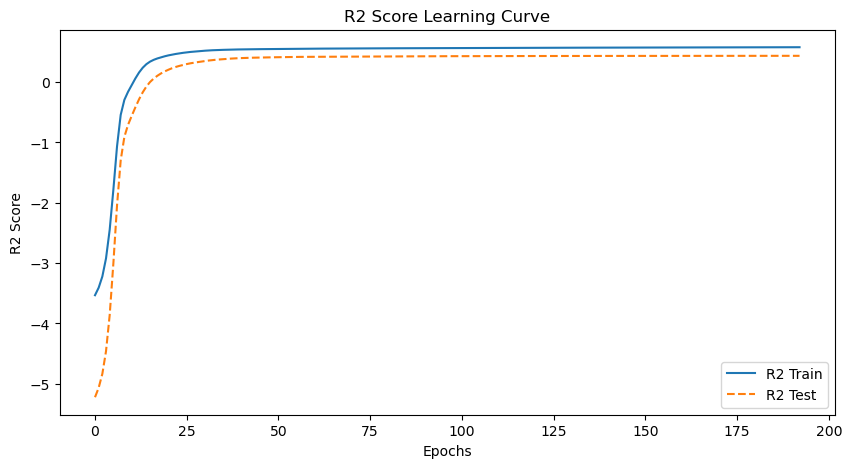

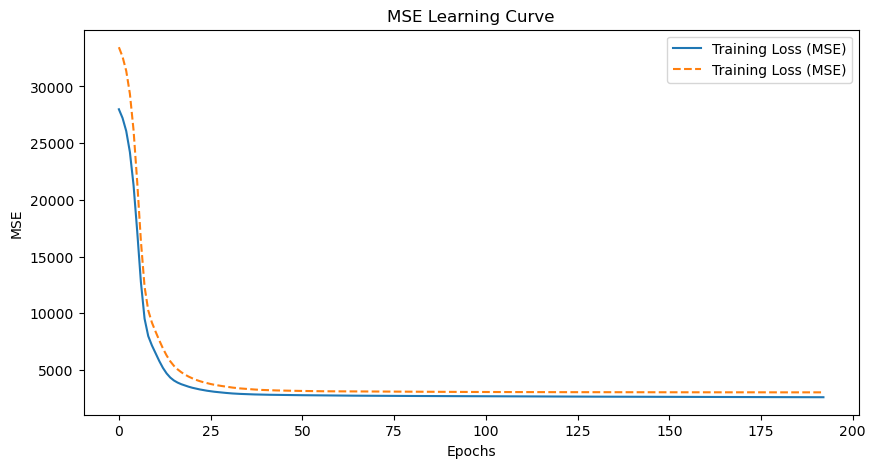

In [12]:
# Set up the neural network for regression
network = NeuralNetwork(
    DenseLayer(X_train.shape[1], 10),
    ReLU(),
    DenseLayer(10, 1)
)
metrics = network.train(X_train, y_train, epochs=10000, learning_rate=0.001, loss='mse',patience=10)

# Plot the learning curves for R2 Score
plt.figure(figsize=(10, 5))
plt.plot(metrics["r2_history_train"], label='R2 Train')
plt.plot(metrics["r2_history_valid"], label='R2 Valid', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score Learning Curve')
plt.legend()
plt.show()

# Plot the learning curves for MSE
plt.figure(figsize=(10, 5))
plt.plot(metrics["loss_history_train"], label='Training Loss (MSE)')
plt.plot(metrics["loss_history_valid"], label='Valid Loss (MSE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Learning Curve')
plt.legend()
plt.show()

In [13]:
predicted= network.predict(X_test)
mse = network.compute_loss(predicted, y_test, "mse")
r2 = r2_score(y_test.flatten(), predicted.flatten())
print(f"MSE:{mse} \n R2:{r2}")

MSE:2724.355793251142 
 R2:0.48579128674184946
